In [10]:
import numpy as np
import pandas as pd

# 최소제곱법

In [11]:
from sklearn.linear_model import LinearRegression
Linear_model = LinearRegression()

x = np.random.rand(50)
y = 0.3*x + 0.8

Linear_model.fit(x.reshape(-1,1),y)    # x에는 꼭 n행 1열의 2차원 배열이 들어갈 것

print("w : %0.2f, b : %0.2f" %(Linear_model.coef_, Linear_model.intercept_))

w : 0.30, b : 0.80


# 경사하강법

In [39]:
from sklearn.linear_model import SGDRegressor

SGD_model = SGDRegressor()

x1 = np.random.rand(5000)
x2 = np.random.rand(5000)
x3 = np.random.rand(5000)

x1 = pd.DataFrame(x1)
x2 = pd.DataFrame(x2)
x3 = pd.DataFrame(x3)

X = pd.concat([x1, x2, x3], axis=1)

y = 0.1*x1 + 0.3*x2 + 0.5*x3 + 0.75

SGD_model.fit(X, y)

print("w1 : %0.2f, w2 : %0.2f, w3: %0.2f, b : %0.2f" %(SGD_model.coef_[0], SGD_model.coef_[1], SGD_model.coef_[2], SGD_model.intercept_))

w1 : 0.12, w2 : 0.31, w3: 0.50, b : 0.74


d:\python\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


# Dataset 다루기

In [44]:
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df['target'] = iris['target']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Data 전처리

### 표준화

In [72]:
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()

x1 = np.arange(0,100).reshape(-1,1)
x2 = np.arange(200,300).reshape(-1,1)

X = np.concatenate([x1,x2], axis=1)

X_s_scaled = s_scaler.fit_transform(X)

y = x1 + x2

Text(0.5, 1.0, 'scaled')

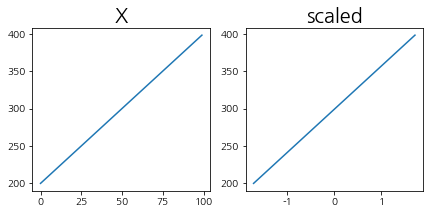

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(7,3))
plt.subplot(1,2,1)
plt.plot(X[:,0],y)
plt.title('X', fontsize=20)

plt.subplot(1,2,2)
plt.plot(X_s_scaled[:,0],y)
plt.title('scaled', fontsize=20)

### 정규화

Text(0.5, 1.0, 'scaled')

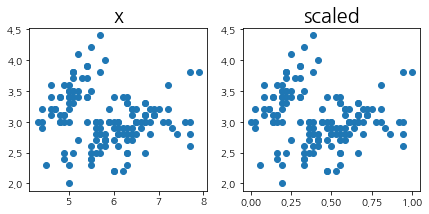

In [117]:
from sklearn.preprocessing import MinMaxScaler

m_scaler = MinMaxScaler()

x = df.iloc[:,[0,1,2,3]]
y = df.iloc[:,1]

x_m_scaled = m_scaler.fit_transform(x)

plt.figure(figsize=(7,3))
plt.subplot(1,2,1)
plt.scatter(x.iloc[:,0],y)
plt.title('x', fontsize=20)

plt.subplot(1,2,2)
plt.scatter(x_m_scaled[:,0],y)
plt.title('scaled', fontsize=20)

### Label Encoding

In [121]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [140]:
x = tips['time']

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

time_en = encoder.fit_transform(x)
encoder.classes_

array(['Dinner', 'Lunch'], dtype=object)

In [143]:
time_de = encoder.inverse_transform(time_en)
time_de

array(['Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner',
       'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner',
       'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner',
       'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner',
       'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner',
       'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner',
       'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner',
       'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner',
       'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner',
       'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner',
       'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner',
       'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner',
       'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Lunch', 'Lunch',
       'Lunch', 'Lunch', 'Lunch', 'Lunch', 'Lunch', 'Lunch', 'Lunch',
       'Lunch', 'Lunch', 'Lunch', 'Lunch', 'Dinner'

In [150]:
x2 = tips['smoker']

smoker_en = encoder.fit_transform(x2)
encoder.classes_

array(['No', 'Yes'], dtype=object)

In [ ]:
smoker_de = encoder.inverse_transform(smoker_en)
smoker_de

# knn 분류

In [166]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

knn = KNeighborsClassifier()

x = df.drop('target', axis=1)
y = df['target']

x_train, x_valid, y_train, y_valid = train_test_split(x, y, random_state=30)

knn.fit(x_train, y_train)
iris_predict = knn.predict(x_valid)

score = (iris_predict == y_valid).mean()
score


0.9210526315789473

### 최적의 k 값 찾기

In [167]:
for k in range(1,11) :
    knn = KNeighborsClassifier(n_neighbors=k)
    
    knn.fit(x_train, y_train)
    iris_predict = knn.predict(x_valid)
    
    score = (iris_predict == y_valid).mean()
    
    print("k:%d, score:%0.2f" %(k, score))
    

k:1, score:0.92
k:2, score:0.95
k:3, score:0.92
k:4, score:0.95
k:5, score:0.92
k:6, score:0.95
k:7, score:1.00
k:8, score:0.95
k:9, score:0.95
k:10, score:0.95
